Data Collection and Preprocessing

In [ ]:
import pandas as pd
import re

# Load the dataset
df = pd.read_csv('X data.csv')

# Function to clean the text
def clean_tweet(tweet):
    # Convert tweet to string if it's not already
    if not isinstance(tweet, str):
        tweet = str(tweet)
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\W', ' ', tweet)      # Remove special characters
    tweet = tweet.lower()                  # Convert to lowercase
    return tweet

# Apply the cleaning function to the clean_text column
df['clean_text'] = df['clean_text'].apply(clean_tweet)

Sentiment Analysis

In [ ]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

sentiments = [get_sentiment(tweet) for tweet in df['clean_text']]


Statistical Analysis and Visualization

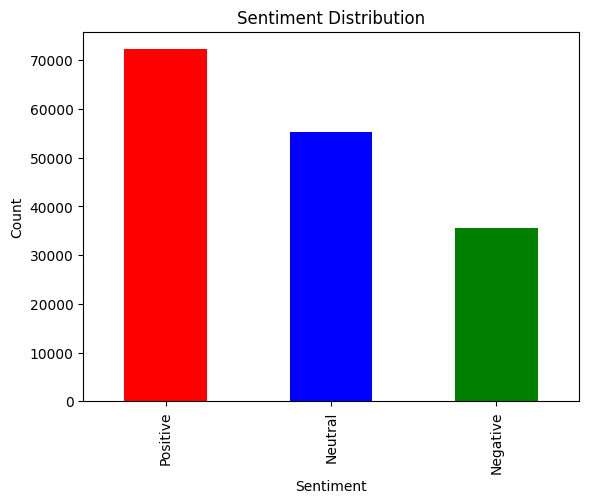

In [ ]:
import matplotlib.pyplot as plt

# Sentiment distribution
sentiment_counts = df['category'].value_counts()

# Map the sentiment labels to their names
sentiment_counts.index = sentiment_counts.index.map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

# Plot sentiment distribution
sentiment_counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [3]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [5]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
data = pd.read_csv('X data.csv')

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment based on VADER scores
def classify_sentiment(text):
    # Convert text to string if it's not already
    text = str(text)  # This line is added to handle float values
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to each post
data['Sentiment'] = data['clean_text'].apply(classify_sentiment)

# Count positive and negative posts
positive_count = data[data['Sentiment'] == 'Positive'].shape[0]
negative_count = data[data['Sentiment'] == 'Negative'].shape[0]

# Print the results
print(f"Number of Positive posts: {positive_count}")
print(f"Number of Negative posts: {negative_count}")

# Conclusion: Overall sentiment trend
if positive_count > negative_count:
    print("Overall sentiment trend is Positive.")
elif negative_count > positive_count:
    print("Overall sentiment trend is Negative.")
else:
    print("The sentiment trend is Neutral.")

Number of Positive posts: 76492
Number of Negative posts: 50776
Overall sentiment trend is Positive.
